<h1>Driver Taught self Driving Simulation based on a desktop app</h1>
<h3> by Edwin Tembo</h3>
I originally completed this in 2020. Updated in 2024 for presentation purposes

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.layers import Dense, Conv2D,Convolution2D,  Flatten, Conv1D, Dropout , MaxPooling2D, Input, BatchNormalization
from tensorflow.keras.activations import sigmoid, relu, elu
from tensorflow.keras.models import Model
import pandas as pd
from pandas import DataFrame as df
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import numpy as np
import os
import random
from imgaug import augmenters as iaa
import ntpath
import sys


In [ ]:
!ls Data

driving_log.csv  IMG  Info.txt	README.md


In [ ]:
data_dir = 'Data'
columns  = ['center', 'left', 'right', 'steering', 'reverse', 'throttle', 'speed']
data     = pd.read_csv(os.path.join(data_dir, 'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', -1)
data.head()




,center,left,right,steering,reverse,throttle,speed
0,C:\Users\visi\Documents\TF\Car_Training_Images\IMG\center_2019_12_04_20_28_36_758.jpg,C:\Users\visi\Documents\TF\Car_Training_Images\IMG\left_2019_12_04_20_28_36_758.jpg,C:\Users\visi\Documents\TF\Car_Training_Images\IMG\right_2019_12_04_20_28_36_758.jpg,0.0,0.0,0.0,1.257849e-05
1,C:\Users\visi\Documents\TF\Car_Training_Images\IMG\center_2019_12_04_20_28_36_829.jpg,C:\Users\visi\Documents\TF\Car_Training_Images\IMG\left_2019_12_04_20_28_36_829.jpg,C:\Users\visi\Documents\TF\Car_Training_Images\IMG\right_2019_12_04_20_28_36_829.jpg,0.0,0.0,0.0,7.527613e-06
2,C:\Users\visi\Documents\TF\Car_Training_Images\IMG\center_2019_12_04_20_28_36_911.jpg,C:\Users\visi\Documents\TF\Car_Training_Images\IMG\left_2019_12_04_20_28_36_911.jpg,C:\Users\visi\Documents\TF\Car_Training_Images\IMG\right_2019_12_04_20_28_36_911.jpg,0.0,0.0,0.0,1.616371e-05
3,C:\Users\visi\Documents\TF\Car_Training_Images\IMG\center_2019_12_04_20_28_36_986.jpg,C:\Users\visi\Documents\TF\Car_Training_Images\IMG\left_2019_12_04_20_28_36_986.jpg,C:\Users\visi\Documents\TF\Car_Training_Images\IMG\right_2019_12_04_20_28_36_986.jpg,0.0,0.0,0.0,6.799983e-07
4,C:\Users\visi\Documents\TF\Car_Training_Images\IMG\center_2019_12_04_20_28_37_063.jpg,C:\Users\visi\Documents\TF\Car_Training_Images\IMG\left_2019_12_04_20_28_37_063.jpg,C:\Users\visi\Documents\TF\Car_Training_Images\IMG\right_2019_12_04_20_28_37_063.jpg,0.0,0.0,0.0,2.518503e-05


In [ ]:
def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail
data['center'] = data['center'].apply(path_leaf)
data['left']   = data['left'].apply(path_leaf)
data['right']  = data['right'].apply(path_leaf)


In [ ]:
data.head()

,center,left,right,steering,reverse,throttle,speed
0,center_2019_12_04_20_28_36_758.jpg,left_2019_12_04_20_28_36_758.jpg,right_2019_12_04_20_28_36_758.jpg,0.0,0.0,0.0,1.257849e-05
1,center_2019_12_04_20_28_36_829.jpg,left_2019_12_04_20_28_36_829.jpg,right_2019_12_04_20_28_36_829.jpg,0.0,0.0,0.0,7.527613e-06
2,center_2019_12_04_20_28_36_911.jpg,left_2019_12_04_20_28_36_911.jpg,right_2019_12_04_20_28_36_911.jpg,0.0,0.0,0.0,1.616371e-05
3,center_2019_12_04_20_28_36_986.jpg,left_2019_12_04_20_28_36_986.jpg,right_2019_12_04_20_28_36_986.jpg,0.0,0.0,0.0,6.799983e-07
4,center_2019_12_04_20_28_37_063.jpg,left_2019_12_04_20_28_37_063.jpg,right_2019_12_04_20_28_37_063.jpg,0.0,0.0,0.0,2.518503e-05


[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]


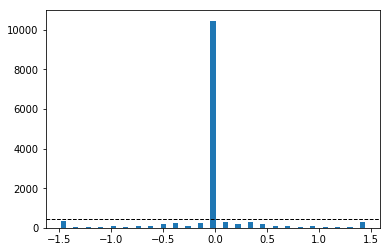

In [ ]:
numbins = 25
max_samples =450
hist, bins = np.histogram(data['steering'], numbins)
print(bins);
center = bins[:-1] + bins[1:] * 0.5
plt.bar(center, hist, width = 0.05)
### using 500 sample per bin to make it a more even distribution
plt.axhline(max_samples, color='k', linestyle='dashed', linewidth=1)
plt.plot()
plt.show()



In [ ]:
remove_list= []
_overrepresented= []
for i in range(len(data['steering'])):
    if((data['steering'][i] >=1.0)):
        _overrepresented.append(i)
_overrepresented = shuffle(_overrepresented)
### remove 80% of the over reprented extreme steering angles
_overrepresented = _overrepresented[int(len(_overrepresented) * 0.8):]
remove_list.extend(_overrepresented)

print(len(remove_list))

57


In [ ]:
print('original data ', len(data))


for j in range(numbins):
    bin_indices = []
    for i in range(len(data)):
        if((data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1])):
            bin_indices.append(i)
    bin_indices = shuffle(bin_indices)
    bin_indices = bin_indices[max_samples:]
    remove_list.extend(bin_indices)

print('removing ...', len(remove_list))
print('original data', len(data))

remove_list = set(remove_list)
unique_list = (list(remove_list))

data.drop(data.index[unique_list], inplace=True)




original data  13654
removing ... 10057
original data 13654


In [ ]:
data.dropna()
len(data)

3597

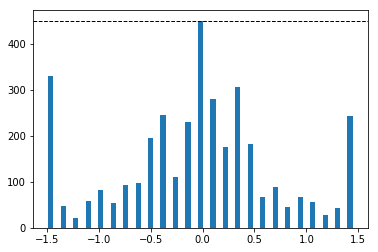

In [ ]:
hist, new_bins = np.histogram(data['steering'], (numbins))
plt.bar(center, hist, width = 0.05)
### using 500 sample per bin to make it a more even distribution
plt.axhline(max_samples, color='k', linestyle='dashed', linewidth=1)
plt.plot()
plt.show()

In [ ]:
print(data.iloc[123])

def image_and_steering(datadir, df):
    image_path = []
    steering_angle = []
    for i in range(len(df)):
        indexed_data = []
        indexed_data = df.iloc[i]
        center_image, left_image, right_image = indexed_data[0], indexed_data[1], indexed_data[2]
        ###use .strip to remove spaces####
        image_path.append(os.path.join(datadir,center_image.strip()))
        steering_angle.append(float(indexed_data[3]))
    image_path = np.asarray(image_path)
    steering_angle = np.asarray(steering_angle)

    return image_path, steering_angle





center      center_2019_12_04_20_29_08_669.jpg
left        left_2019_12_04_20_29_08_669.jpg  
right       right_2019_12_04_20_29_08_669.jpg 
steering   -0.6                               
reverse     0                                 
throttle    0                                 
speed       8.49047                           
Name: 404, dtype: object


In [ ]:
image_paths, steering_angles = image_and_steering(data_dir + '/IMG', data)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(image_paths, steering_angles, test_size=0.2, random_state=6)

In [ ]:
print ([len(xtrain) , len(ytrain)])
print ([len(xtest) , len(ytest)])

[2877, 2877]
[720, 720]


Text(0.5, 1.0, 'Validation Set')

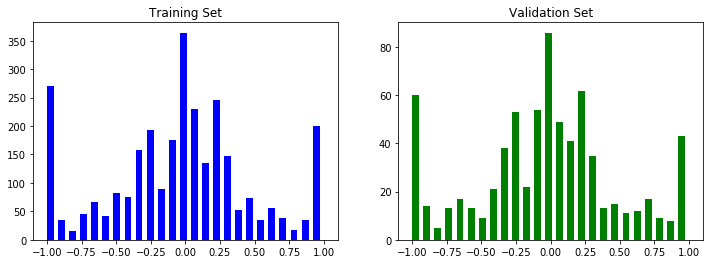

In [ ]:
fig, axis = plt.subplots(1,2, figsize= (12,4))
axis[0].hist(ytrain, numbins, width= 0.05, color= 'blue')
axis[0].set_title('Training Set')
axis[1].hist(ytest, numbins, width=0.05, color='green')
axis[1].set_title('Validation Set')




In [ ]:


unique, counts = np.unique(ytrain, return_counts=True)
unique_yt, counts_yt = np.unique(ytest, return_counts=True)

ytrainlist = list(ytrain)
count_of_ones = ytrainlist.count(1.0)
count_of_minusones = ytrainlist.count(-1.0)
print(count_of_ones)
print(count_of_minusones)

ytestlist = list(ytest)
count_of_ytones = ytestlist.count(1.0)
count_of_ytminusones = ytestlist.count(-1.0)
print(count_of_ytones)
print(count_of_ytminusones)


181
255
46
60


In [ ]:
for i in  range(len(unique)):
    list_of_indices= []
    if abs(unique[i]) == 1.0 :
        print('Adding Test Indices : ' , unique[i])
        for k in range(len(ytrainlist)):
            if abs(ytrainlist[k])== abs(unique[i]):
                list_of_indices.append(k)
print( 'Y_train indices : ', str(len(list_of_indices)))

print('--------------------------------- \n')
##### for validation set #######
for i in  range(len(unique_yt)):
    list_of_indices_yt= []
    if abs(unique_yt[i]) == 1.0 :
        print('Adding Validation Indices : ' , unique_yt[i])
        for k in range(len(ytestlist)):
            if abs(ytestlist[k])== abs(unique_yt[i]):
                list_of_indices_yt.append(k)
print('Y_Validation indices : ', str(len(list_of_indices_yt)))


Adding Test Indices :  -1.0
Adding Test Indices :  1.0
Y_train indices :  436
--------------------------------- 

Adding Validation Indices :  -1.0
Adding Validation Indices :  1.0
Y_Validation indices :  106


In [ ]:
values_to_slice = []
for idx in list_of_indices:
    values_to_slice.append(ytrain[idx])
## be sure only -1 and 1 are represnted
print( 'For Training: ' , str(sorted( list(set(values_to_slice)))))

values_to_slice_yt = []
for idx in list_of_indices_yt:
    values_to_slice_yt.append(ytest[idx])
## be sure only -1 and 1 are represnted
print( 'For Validation: ' , str(sorted( list(set(values_to_slice_yt)))))

For Training:  [-1.0, 1.0]
For Validation:  [-1.0, 1.0]


In [ ]:
###reducing the overepresented extremes to fit the distribution
### shuffle the indices and keep 30%
list_of_indices = shuffle(list_of_indices)
list_of_indices_yt = shuffle(list_of_indices_yt)

to_remove = []
for i in range(len(list_of_indices)):
    if len(to_remove) <= 0.7* len(list_of_indices):
        idx_to_remove = random.randint(0, len(list_of_indices) - 1)
        to_remove.append(list_of_indices[idx_to_remove])


print('___Training___')
print(len(list_of_indices))
print(len(to_remove))

to_remove_yt = []
for i in range(len(list_of_indices_yt)):
    if len(to_remove_yt) <= 0.7* len(list_of_indices_yt):
        idx_to_remove_yt = random.randint(0, len(list_of_indices_yt) - 1)
        to_remove_yt.append(list_of_indices_yt[idx_to_remove_yt])

print('___Validation___')
print(len(list_of_indices_yt))
print(len(to_remove_yt))

___Training___
436
306
___Validation___
106
75


In [ ]:

xtrain_cleaned, ytrain_cleaned = np.delete(xtrain, to_remove), np.delete(ytrain, to_remove)
xtest_cleaned, ytest_cleaned   = np.delete(xtest, to_remove_yt), np.delete(ytest, to_remove_yt)




'\nxtrain_cleaned, ytrain_cleaned = np.delete(xtrain, to_remove), np.delete(ytrain, to_remove)\nxtest_cleaned, ytest_cleaned   = np.delete(xtest, to_remove_yt), np.delete(ytest, to_remove_yt)\n'

2661 2661
667 667


Text(0.5, 1.0, 'Validation Set')

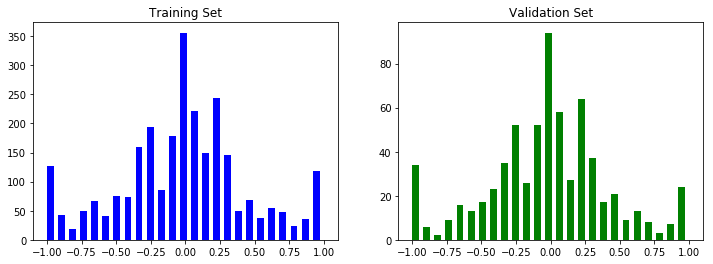

In [ ]:
print(len(xtrain_cleaned), len(ytrain_cleaned))
print(len(xtest_cleaned), len(ytest_cleaned))

fig, axis = plt.subplots(1,2, figsize= (12,4))
axis[0].hist(ytrain_cleaned, numbins, width= 0.05, color= 'blue')
axis[0].set_title('Training Set')
axis[1].hist(ytest_cleaned, numbins, width=0.05, color='green')
axis[1].set_title('Validation Set')

In [ ]:
xtrain, ytrain = xtrain_cleaned, ytrain_cleaned
xtest, ytest = xtest_cleaned, ytest_cleaned


In [ ]:
###augmentation for image generation

def zoom_fn(img):
    zoomer = iaa.Affine(scale=(1,1.3)) ## randomly select values between 1 and 1.3
    img = zoomer.augment_image(img)
    return img

def pan(img):
    ##{"x": (-0.2, 0.2), "y": (-0.2, 0.2)}
    panner = iaa.Affine(translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)})
    ##tf.keras.preprocessing.image.random_shift(x= img,wrg = 0.1,hrg = 0.1,  row_axis=0,col_axis=1,channel_axis=2)

    return img

def img_random_brightness(img):
    brightness = iaa.Multiply((0.2, 1.2))
    img = brightness.augment_image(img);
    return img

def img_flip(img, steering_angle):
    flipper = iaa.Fliplr(1.0)
    img = flipper.augment_image(img)
    steering_angle = -steering_angle
    return img, steering_angle


0
1
2
3


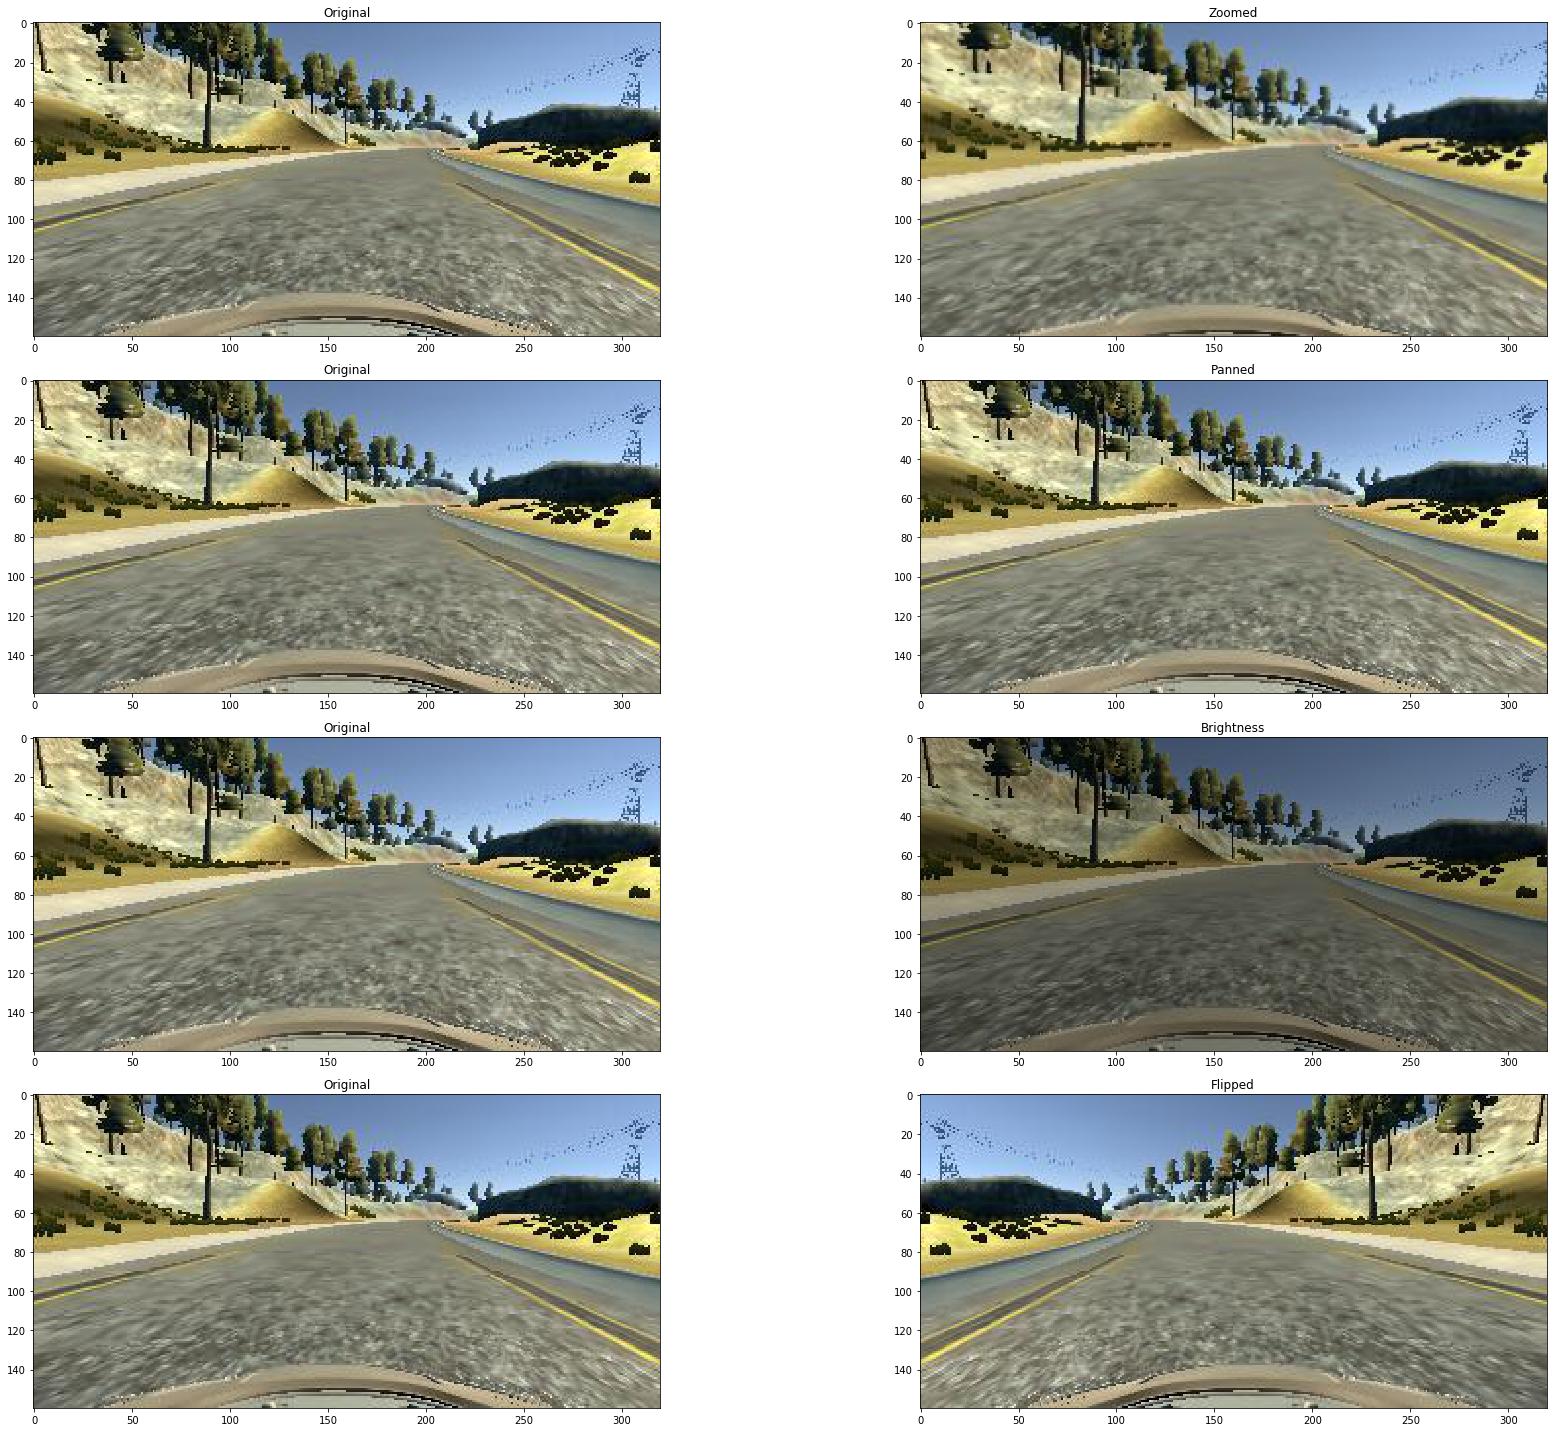

In [ ]:
idx = random.randint(0,len(image_paths)-1)

imtitles = ['Zoomed', 'Panned',   'Brightness', 'Flipped']

img = mpimg.imread(image_paths[idx])
###zoomed = zoom(mpimg.imread(image_paths[idx]))

imlist = []
imlist.append(zoom_fn(mpimg.imread(image_paths[idx])))
imlist.append(pan(mpimg.imread(image_paths[idx])))
imlist.append(img_random_brightness(mpimg.imread(image_paths[idx])))
flipped, st = img_flip((mpimg.imread(image_paths[idx])), steering_angles[idx] )

fig, axis = plt.subplots( len(imlist) +1,2, figsize=(30,20))
for i in range(len(imlist) +1):
    print(i)
    if i < len(imlist):
        imaug = imlist[i]
    else:
        imaug = flipped

    axis[i][0].imshow(img)
    axis[i][0].set_title('Original')

    axis[i][1].imshow(imaug)
    axis[i][1].set_title(imtitles[i])
    plt.tight_layout()
 #plt.show()

In [ ]:
idx = random.randint(0,len(image_paths)-1)
img = mpimg.imread(image_paths[idx])
img.shape
###zoomed = zoom(mpimg.imread(image_paths[idx]))

(160, 320, 3)

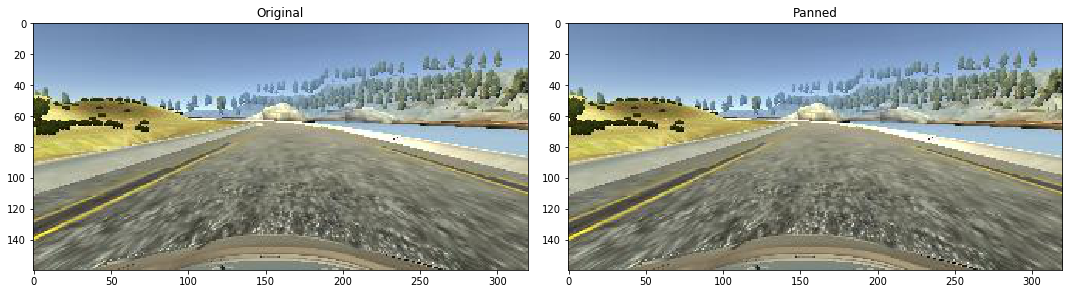

In [ ]:

panned = pan(mpimg.imread(image_paths[idx]))
fig, axis = plt.subplots( 1,2, figsize=(15,10))
axis[0].imshow(img)
axis[0].set_title('Original')

axis[1].imshow(panned)
axis[1].set_title('Panned')
plt.tight_layout()
plt.show()


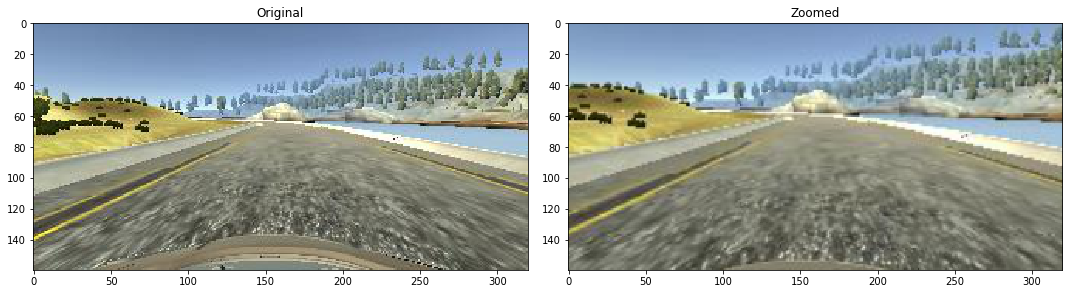

In [ ]:
zoom = zoom_fn(mpimg.imread(image_paths[idx]))
fig, axis = plt.subplots( 1,2, figsize=(15,10))
axis[0].imshow(img)
axis[0].set_title('Original')

axis[1].imshow(zoom)
axis[1].set_title('Zoomed')
plt.tight_layout()
plt.show()

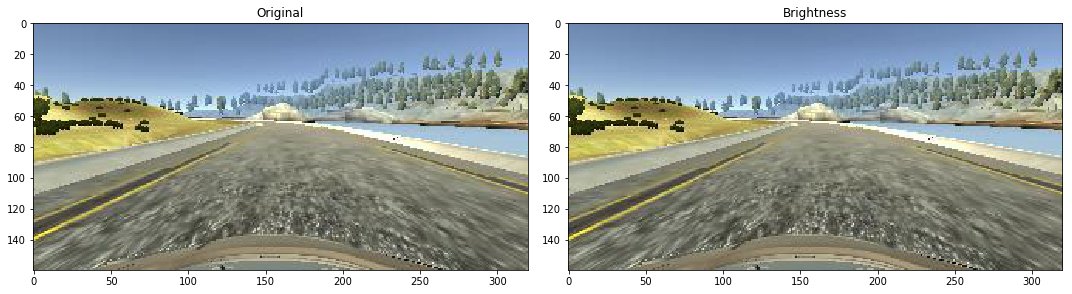

In [ ]:
imgbrightness = img_random_brightness(mpimg.imread(image_paths[idx]))
fig, axis = plt.subplots( 1,2, figsize=(15,10))
axis[0].imshow(img)
axis[0].set_title('Original')

axis[1].imshow(imgbrightness)
axis[1].set_title('Brightness')
plt.tight_layout()
plt.show()


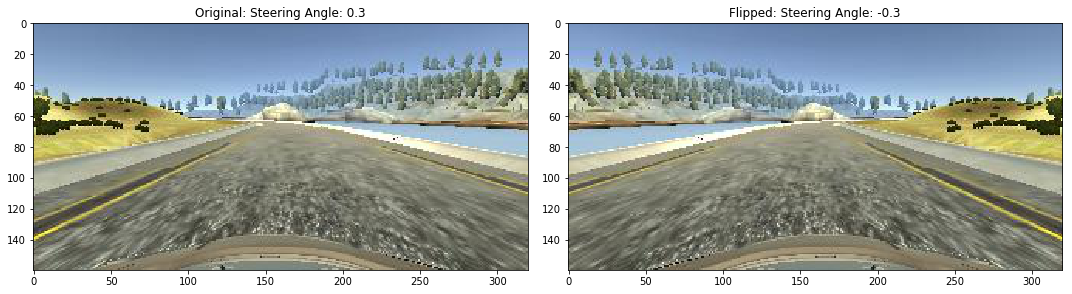

In [ ]:
flipped, st = img_flip((mpimg.imread(image_paths[idx])), steering_angles[idx] )

fig, axis = plt.subplots( 1,2, figsize=(15,10))
axis[0].imshow(img)
axis[0].set_title('Original: Steering Angle: ' + str(steering_angles[idx]))

axis[1].imshow(flipped)
axis[1].set_title('Flipped: Steering Angle: ' + str(st))
plt.tight_layout()
plt.show()

In [ ]:
def random_augment(img_path, steering_angle):
    img = mpimg.imread(img_path)

    if np.random.rand() < 0.5:
        img = zoom_fn(img)
    if np.random.rand() < 0.5:
        img = img_random_brightness(img)
    if np.random.rand() < 0.5:
        img = pan(img)

    if np.random.rand() < 0.5:
        img = img_flip(img, steering_angle)

    return img, steering_angle

In [ ]:
def _preprocessing(img, augment=True, remove_scene=True, colorspace='YUV', resize = True, resize_w= 200 ,
                   resize_h=66, _normalize = True):

    if (colorspace == 'YUV'):
        img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)

    img = cv2.GaussianBlur(img, (3,3), 0)

    if (remove_scene):
        img = img[60:135,:,:]
    if (resize):
        img = cv2.resize(img, (resize_w,resize_h))

    ### normalize
    if (_normalize):
        if(img.shape[0]  > 1):
            img = img/255

    return img




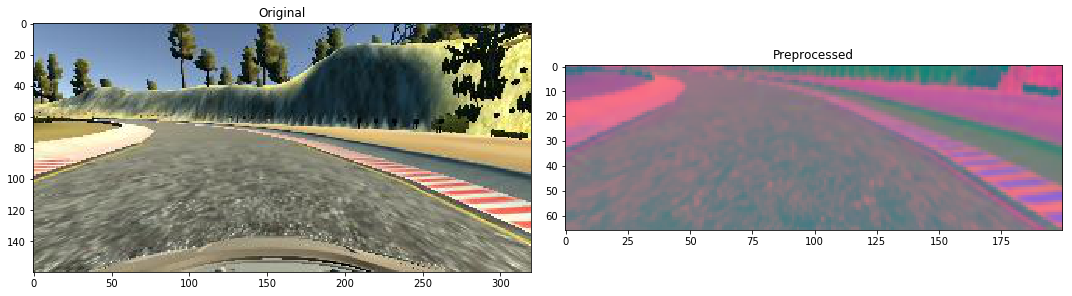

In [ ]:

img = mpimg.imread(image_paths[0])
processed_img = _preprocessing(img)

fig, axis = plt.subplots(1,2, figsize=(15,10))
axis[0].imshow(img)
axis[0].set_title('Original')

axis[1].imshow(processed_img)
axis[1].set_title('Preprocessed')
plt.tight_layout()
plt.show()

In [ ]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):
  while True:

    batch_img = []
    batch_steering = []

    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths) - 1)

      if istraining:
        im, steering = random_augment(image_paths[random_index], steering_ang[random_index])

      else:
        im = mpimg.imread(image_paths[random_index])
        steering = steering_ang[random_index]

      if type(im) == np.ndarray :
        im = _preprocessing(im)
      else :
        ##print( 'Converting to Array  in IDX: ' , str(random_index))
        ##print('im type :', str(type(im)))
        ###print(' Elements in im tuple:', len(im))
        ##print( im[1])
        ##print(im)
        im = _preprocessing(np.asarray(im[0]))


      batch_img.append(im)
      batch_steering.append(steering)
    yield (np.asarray(batch_img), np.asarray(batch_steering))




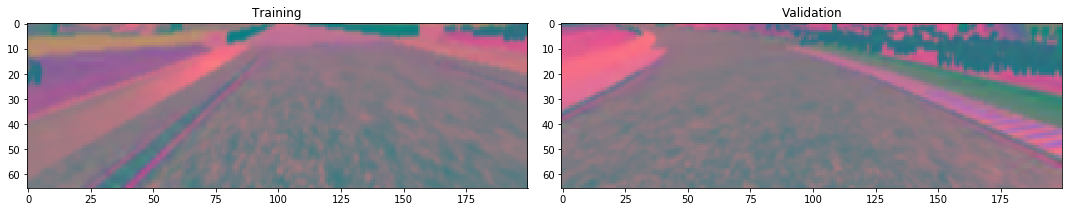

In [ ]:
### test batch generator

x , y = next(batch_generator(xtrain, ytrain, 1, 1))
a, b  = next(batch_generator(xtest, ytest, 1, 0))

xt = x[0]
xv = a[0]
fig, axis = plt.subplots(1,2, figsize=(15,10))
axis[0].imshow(xt)
axis[0].set_title('Training')

axis[1].imshow( xv)
axis[1].set_title('Validation')
plt.tight_layout()
plt.show()



In [ ]:
xtrain.shape

(2661,)

In [ ]:

epochs = 100
inputs = Input(shape=(66,200,3), name='img')
conv1 = Conv2D(filters=32, kernel_size=(5,5), padding="valid", strides=(2,2), activation ='relu', name= 'conv1' )(inputs)
conv2 = Conv2D(filters=64, kernel_size=(2, 2), padding="valid", strides=(2,2), activation ='relu', name= 'conv2')(conv1)
conv3 = Conv2D(filters=128, kernel_size=(2, 2), padding="valid", strides=(2,2), activation ='relu', name= 'conv3')(conv2)
maxpool1 =MaxPooling2D(pool_size=2, strides=2, padding='same', name = 'maxpool1')(conv3)

conv4 = Conv2D(filters=256, kernel_size=(1, 1), padding="valid", strides=(2,2), activation ='relu', name= 'conv4')(conv3)
conv5 = Conv2D(filters=512, kernel_size=(1, 1), padding="valid", strides=(2,2), activation ='relu',  name= 'conv5')(conv4)
maxpool2 =MaxPooling2D(pool_size=2, strides=2, padding='same', name = 'maxpool2')(conv5)

dropout = Dropout(0.50, name = 'dropout')(maxpool2)

flat = Flatten(name='flatten')(dropout)
Dense1 = Dense(units=100, activation='relu', name ='dense1')(flat)
dropout1 = Dropout(0.50, name = 'dropout1')(Dense1)
Dense2 = Dense(units=50, activation='relu', name ='dense2')(dropout1)
pred   = Dense(units=1)(Dense2)

model = Model(inputs= inputs, outputs=pred)





In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 66, 200, 3)]      0         
_________________________________________________________________
conv1 (Conv2D)               (None, 31, 98, 32)        2432      
_________________________________________________________________
conv2 (Conv2D)               (None, 15, 49, 64)        8256      
_________________________________________________________________
conv3 (Conv2D)               (None, 7, 24, 128)        32896     
_________________________________________________________________
conv4 (Conv2D)               (None, 4, 12, 256)        33024     
_________________________________________________________________
conv5 (Conv2D)               (None, 2, 6, 512)         131584    
_________________________________________________________________
maxpool2 (MaxPooling2D)      (None, 1, 3, 512)         0     

In [ ]:
import os

optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer, loss='mae')


In [ ]:
xtrain[0]

'Data/IMG/center_2019_12_04_21_01_40_431.jpg'

In [ ]:
model_dir = './models/nvidia_like_steering'

def scheduler(epoch):
    if epoch < 20:
        return 0.0001
    else:
        return float(0.0001 * tf.math.exp(0.1 * (10 - epoch)))

callbacks = [
    ## reduce learnings rate after 10 epochs
    tf.keras.callbacks.LearningRateScheduler(scheduler),
    # Callback to interrupt the training if the validation loss/metrics stops improving for some epochs:
    tf.keras.callbacks.EarlyStopping(patience=8, monitor='val_loss',
                                     restore_best_weights=True),
    # Callback to log the graph, losses and metrics into TensorBoard:
    tf.keras.callbacks.TensorBoard(log_dir=model_dir, histogram_freq=0, write_graph=True),
    # Callback to save the model (e.g., every 5 epochs), specifying the epoch and val-loss in the filename:
    tf.keras.callbacks.ModelCheckpoint(
        os.path.join(model_dir, 'weights-epoch{epoch:02d}-loss{val_loss:.2f}.h5'), save_freq='epoch')

]

In [ ]:

history = model.fit_generator(generator = batch_generator(xtrain,ytrain, 100, 1),
                              steps_per_epoch=300,
                              epochs=epochs,
                              verbose=1,
                              callbacks=callbacks,
                              validation_data= batch_generator(xtest,ytest, 100, 1),
                              validation_steps=100,
                              validation_freq=1,
                              class_weight=None,
                              max_queue_size=10,
                              workers=1,
                              use_multiprocessing=False,
                              shuffle=True,
                              initial_epoch=0
                             )

Epoch 1/100
300/300 [==============================] - 225s 751ms/step - loss: 0.3416 - val_loss: 0.3296
Epoch 2/100
300/300 [==============================] - 220s 734ms/step - loss: 0.3431 - val_loss: 0.3270
Epoch 3/100
300/300 [==============================] - 219s 729ms/step - loss: 0.3435 - val_loss: 0.3196
Epoch 4/100
300/300 [==============================] - 213s 709ms/step - loss: 0.3321 - val_loss: 0.3200
Epoch 5/100
300/300 [==============================] - 219s 729ms/step - loss: 0.3227 - val_loss: 0.3002
Epoch 6/100
300/300 [==============================] - 219s 731ms/step - loss: 0.3140 - val_loss: 0.2915
Epoch 7/100
300/300 [==============================] - 220s 734ms/step - loss: 0.3047 - val_loss: 0.2918
Epoch 8/100
300/300 [==============================] - 218s 726ms/step - loss: 0.2982 - val_loss: 0.2860
Epoch 9/100
300/300 [==============================] - 218s 727ms/step - loss: 0.2931 - val_loss: 0.2910
Epoch 10/100
300/300 [==============================] -

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.xlabel('Epoch')
plt.title('Loss')
plt.show()

In [ ]:
tf.keras.models.save_model(model, './models/nvidia_like_steering/mae_adam_model3/model3.h5')